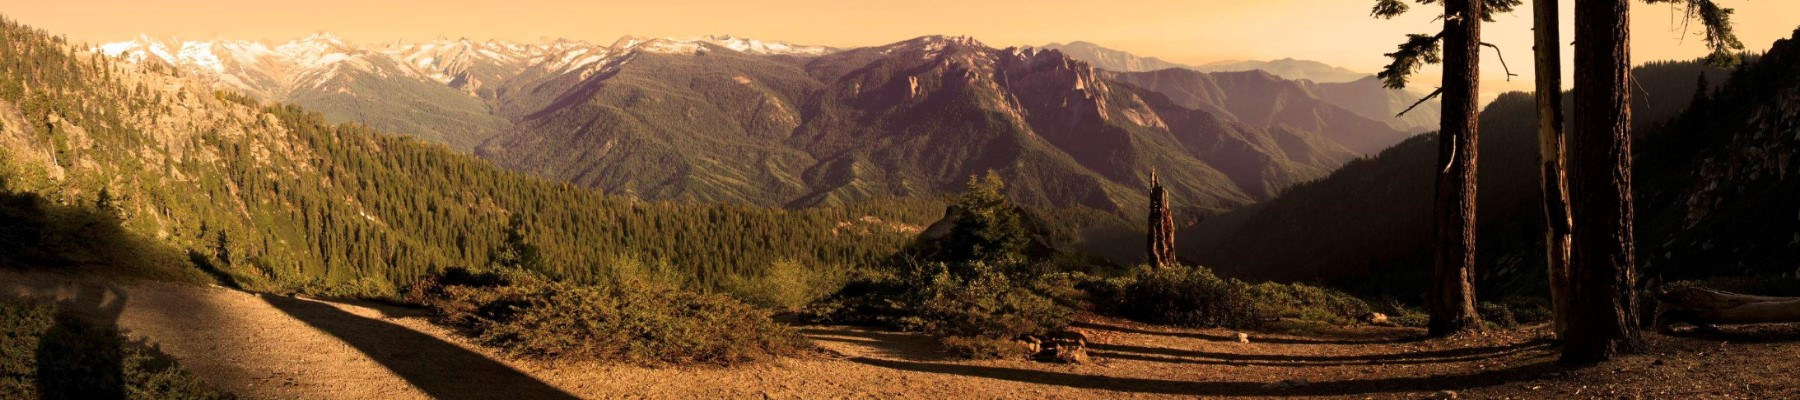

# 1. | INTRODUCTION

**1.1** **|**  **Pet-Project name:** California housing prices

**1.2** **|** **Pet-Project Goal:** Analyze, visualize, preprocess the dataset. Build some price-prediction models and choose the best one.

**1.3** **|** **Sorce:** Kaggle.com

# 2. | **ABOUT DATASET**
**2.1** **|** **Context**

This is the dataset used in the second chapter of Aurélien Géron's recent book 'Hands-On Machine learning with Scikit-Learn and TensorFlow'. It serves as an excellent introduction to implementing machine learning algorithms because it requires rudimentary data cleaning, has an easily understandable list of variables and sits at an optimal size between being to toyish and too cumbersome.


The data contains information from the 1990 California census. So although it may not help you with predicting current housing prices like the Zillow Zestimate dataset, it does provide an accessible introductory dataset for teaching people about the basics of machine learning.


**2.1** **|** **Content**

The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. Be warned the data aren't cleaned so there are some preprocessing steps required! The columns are as follows, their names are pretty self explanitory:

> longitude

> latitude

> housingmedianage

> total_rooms

> total_bedrooms

> population

> households

> median_income

> medianhousevalue

> ocean_proximity


# 3. | DATA PREPROCESSING


#### 3.1 | Importing the necessary libraries

In [1]:
# Data manipulation
import pandas as pd
import numpy as np
from scipy import stats 
from sklearn.model_selection import train_test_split
from scipy.stats import skew

# Data visualization
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

# Machine Learning metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

# Machine Learning models to be used
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor


import warnings
warnings.filterwarnings('ignore')

#### 3.2 | Loading and discovering dataset

In [2]:
initial_dataset = pd.read_csv('CaliforniaHousing.csv')

initial_dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
# Basic information about dataset
initial_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
# Some statistical information
initial_dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
# Showing rows with missing values
initial_dataset[initial_dataset.isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [6]:
# How many missing values dataset has
initial_dataset.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

There are 207 missing values in 'total_bedrooms' column, this is not big part of our dataset, so we can easily drop the rows:

In [7]:
# Creating new DataFrame
preprocessed_dataset = initial_dataset.dropna()

#### To use ML models the DataFrame has to be a numerical table, so we want it to contain only dtypes of float64 or int64. 

In [8]:
# Which columns have type 'object'
initial_dataset.select_dtypes(['object']).columns

Index(['ocean_proximity'], dtype='object')

#### 3.3 | Сhange 'ocean_proximity' dtype by using by using Dummy Variables

In [9]:
# This is how it's going to look like
pd.get_dummies(preprocessed_dataset['ocean_proximity']).head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [10]:
# Now concatenate Dummy Variables to the DataFrame and drop 'ocean_proximity' 

preprocessed_dataset = pd.concat([preprocessed_dataset,
                       pd.get_dummies(preprocessed_dataset['ocean_proximity'])],
                       axis=1)
preprocessed_dataset = preprocessed_dataset.drop('ocean_proximity', axis=1)

preprocessed_dataset.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


# 4. | EXPLORATORY DATA ANALYSIS

In [11]:
preprocessed_dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155,0.442128,0.317917,0.000245,0.111095,0.128615
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099,0.496652,0.465678,0.015641,0.314257,0.334782
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
columns_to_plot = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

array([[<AxesSubplot: title={'center': 'housing_median_age'}>,
        <AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>],
       [<AxesSubplot: title={'center': 'population'}>,
        <AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>],
       [<AxesSubplot: title={'center': 'median_house_value'}>,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

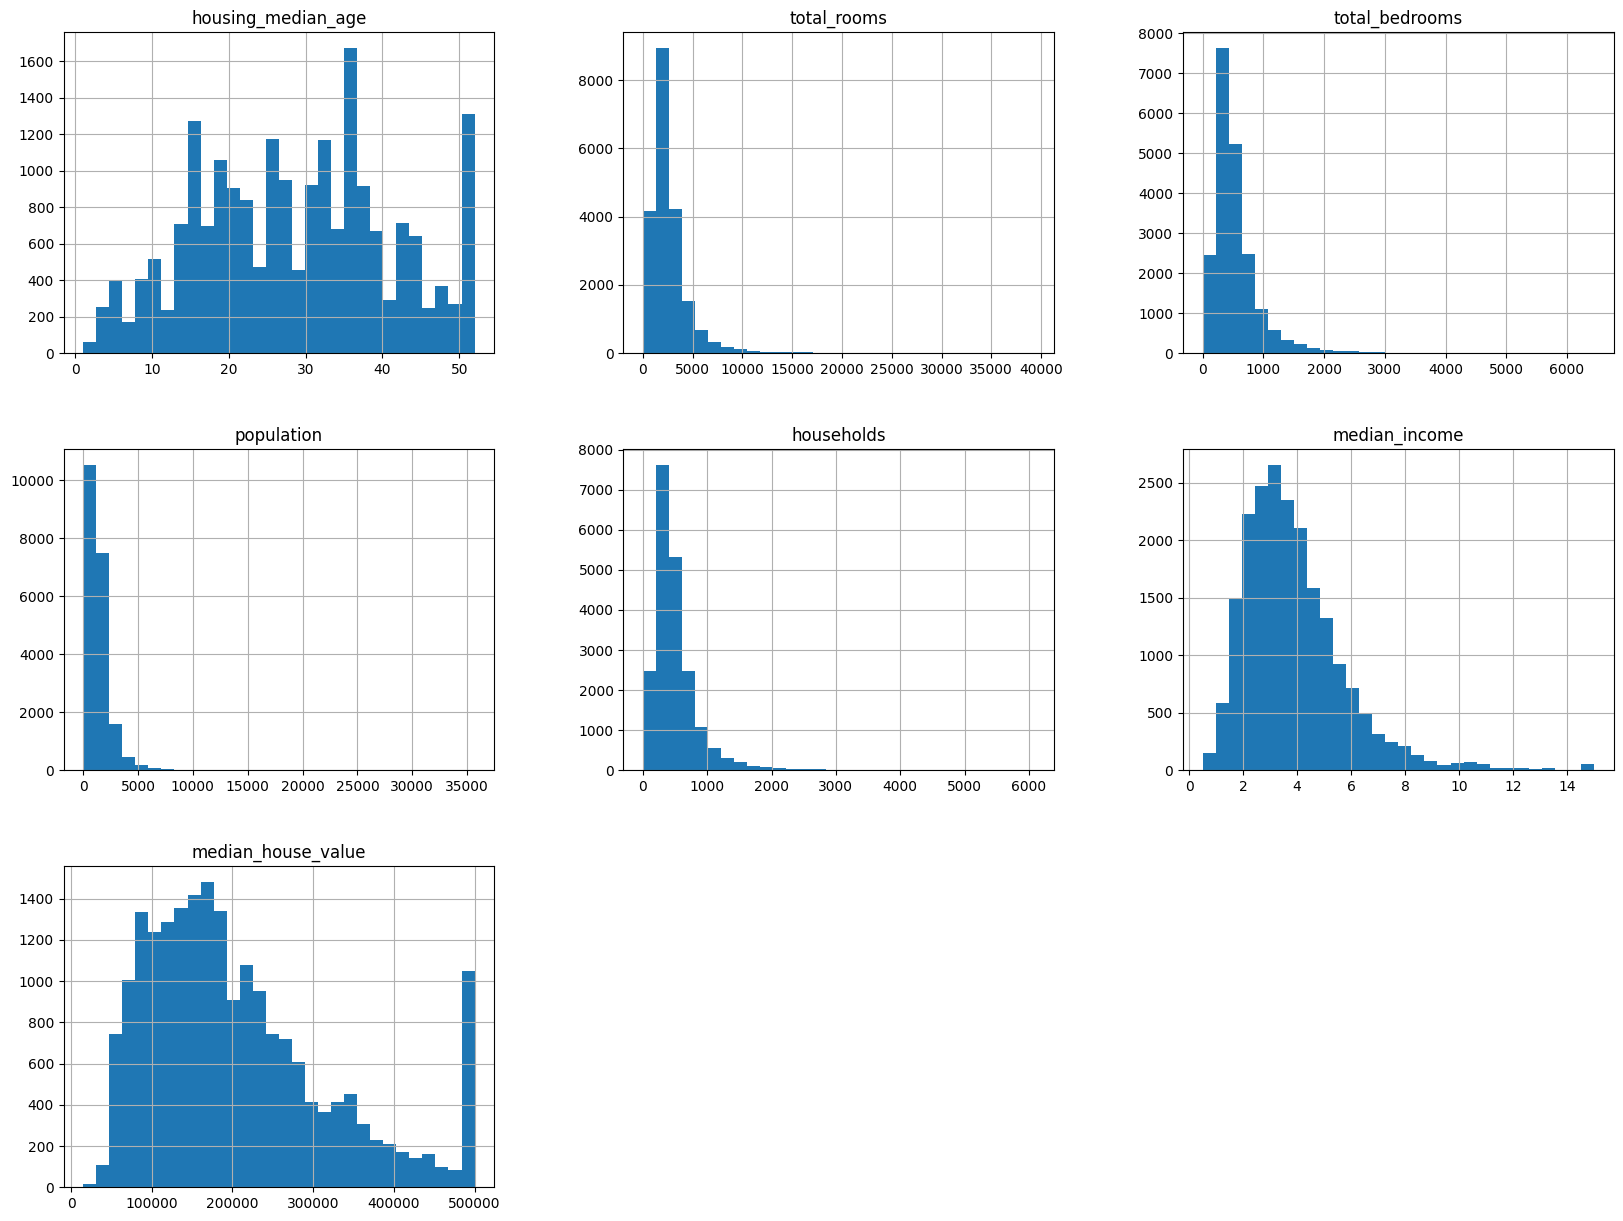

In [13]:
# Plot histogram of necessary columns
preprocessed_dataset[columns_to_plot].hist(bins = 30, figsize=(20, 15))

Now we can see that almost all data are normally distributed, except for the column 'housing_median_age'. Feature Median_house_value has an odd peak at its maximum value (around 500k), which could be an outlier.

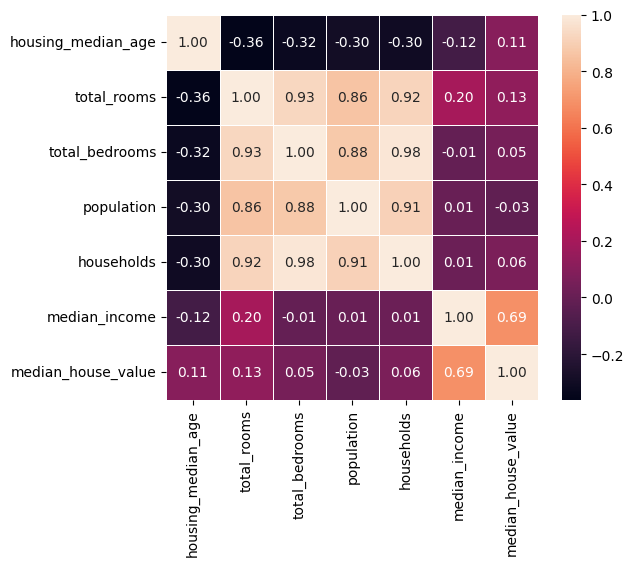

In [14]:
# Plot correlation matrix
f,ax = plt.subplots(figsize=(6, 5))
sns.heatmap(preprocessed_dataset[columns_to_plot].corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)
plt.show()

Target variable median_house_value is very mildly correlated to all but one feature here: median_income, so one might outline this as an important feature. A correlation of -0.02 & -0.05 (population/longitude) to the target variable median_house_value might be worth dropping, but they might not be. In fact, a low value isn't exactly a reason to drop a feature. It could simply imply the data is spread quite a lot, which is a strong indicator of nonlinearity. It is often advised to drop such features, especially for less complex models, as the model probably won't be able to pick up on one feature with such nonlinearity, let alone multiple. It's possible to plot a shifted matrix, which looks a little nicer, code can be found here

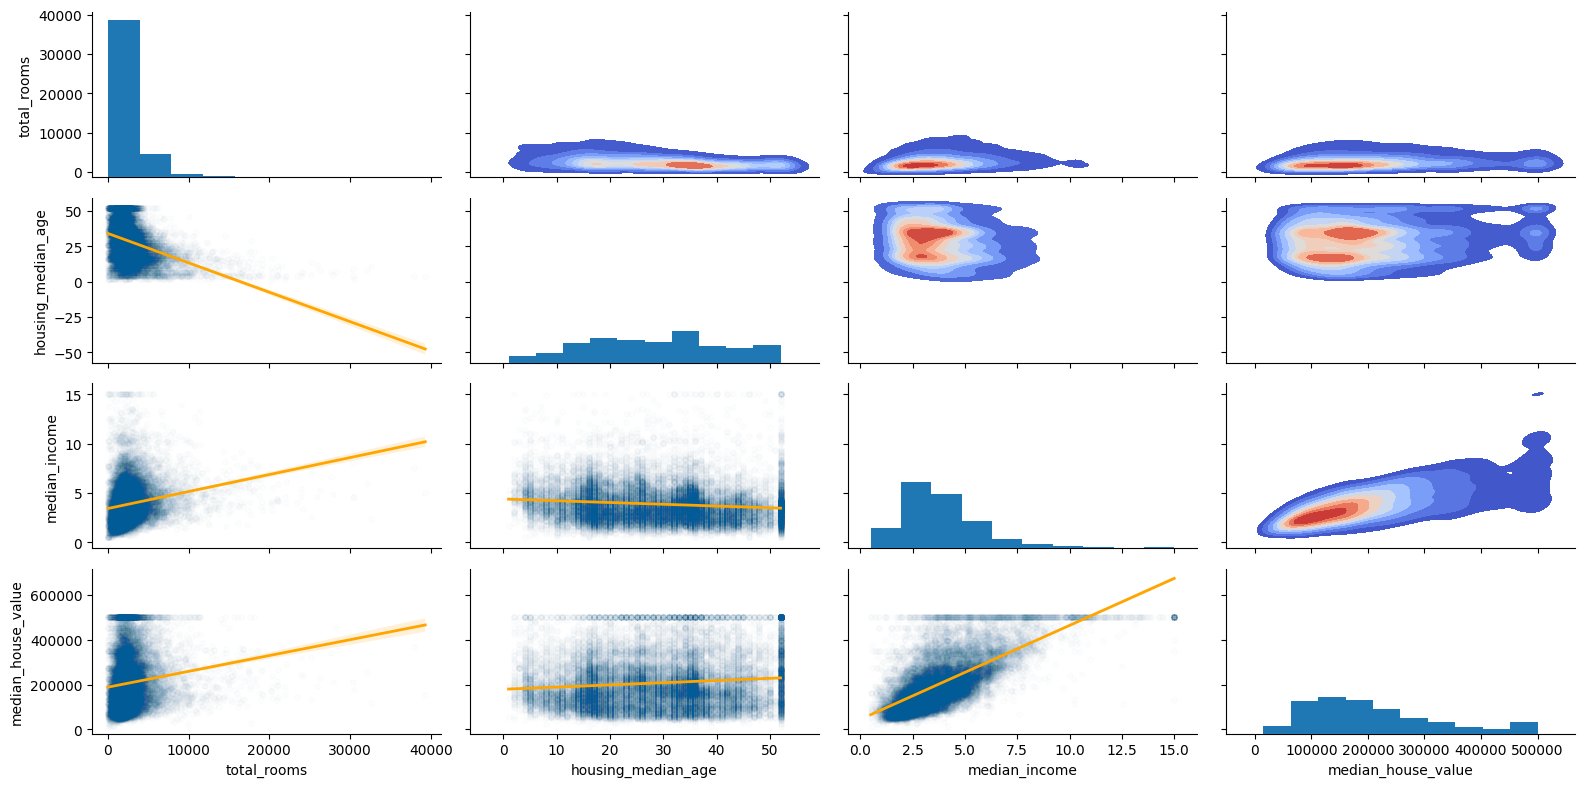

In [15]:
grid = sns.PairGrid(preprocessed_dataset, vars=['total_rooms','housing_median_age','median_income',
                                                'median_house_value'], height=2, aspect = 2)

grid = grid.map_diag(plt.hist)
grid = grid.map_lower(sns.regplot, scatter_kws = {'s': 15, 'alpha': 0.01, 'color': '#005b96'}, 
                      line_kws = {'color':'orange', 'linewidth': 2})
grid = grid.map_upper(sns.kdeplot, n_levels = 10, cmap= 'coolwarm', shade = True)

plt.show()

There are lots of outliers in our features. We will apply log transformation later to deal with it.

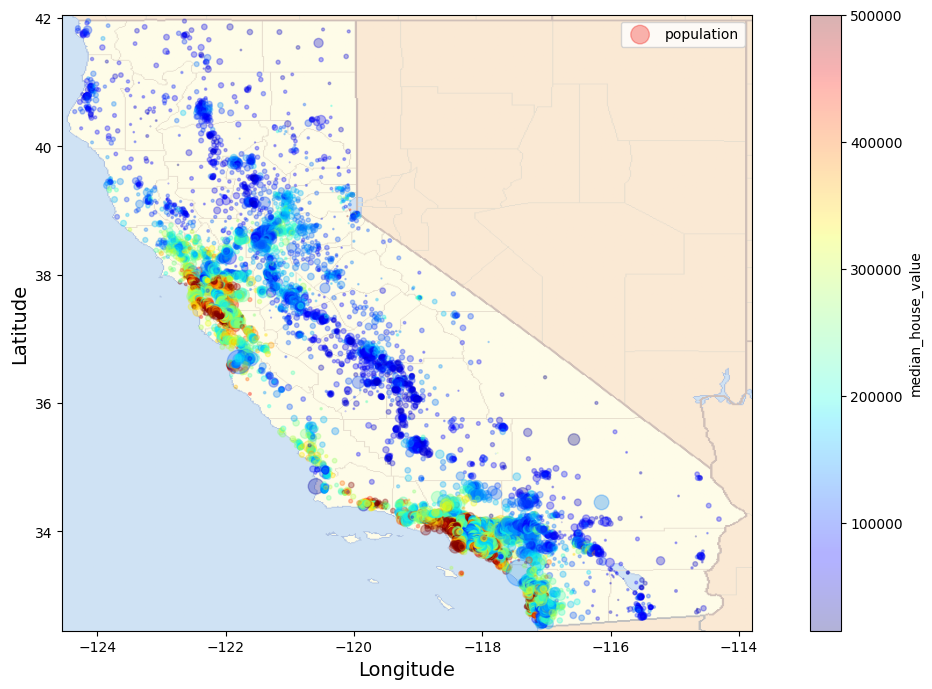

In [16]:
# Map of the location and population of housing districts, shows where homes are the most expensive

california_img=mpimg.imread('california.png')

preprocessed_dataset.plot(kind="scatter", x="longitude", y="latitude", alpha=0.3,
        s=preprocessed_dataset["population"]/100, label="population", figsize=(15,8),
        c="median_house_value", cmap=plt.get_cmap("jet"),colorbar=True)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend() 
plt.show()

# Feature Transformations

In [17]:
skew_df = pd.DataFrame(preprocessed_dataset[columns_to_plot].select_dtypes(np.number).columns, columns= ['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: skew(preprocessed_dataset[feature]))
skew_df['Abs_Skew'] = skew_df['Skew'].apply(abs)
skew_df['Skewed'] = skew_df['Abs_Skew'].apply(lambda x: True if x > 0.5 else False)
skew_df

,Feature,Skew,Abs_Skew,Skewed
0,housing_median_age,0.061601,0.061601,False
1,total_rooms,4.158511,4.158511,True
2,total_bedrooms,3.459292,3.459292,True
3,population,4.959652,4.959652,True
4,households,3.413600,3.413600,True
5,median_income,1.644436,1.644436,True
6,median_house_value,0.978218,0.978218,True


In [18]:
skewed_columns = skew_df[skew_df['Abs_Skew'] > 0.5]['Feature'].values
print(skewed_columns)
for column in skewed_columns:
    preprocessed_dataset[column] = np.log(preprocessed_dataset[column])

['total_rooms' 'total_bedrooms' 'population' 'households' 'median_income'
 'median_house_value']


# Scaling

In [19]:
final_dataset = preprocessed_dataset.copy()
for column in columns_to_plot:
    final_dataset[column] = stats.zscore(final_dataset[column])
final_dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,0.982163,-1.129056,-1.625687,-1.691249,-1.560772,1.858507,1.647730,0,0,0,1,0
1,-122.22,37.86,-0.606210,1.648010,1.306611,1.028830,1.440800,1.852423,1.238249,0,0,0,1,0
2,-122.24,37.85,1.855769,-0.449280,-1.097264,-1.106337,-1.097230,1.566841,1.206603,0,0,0,1,0
3,-122.25,37.85,1.855769,-0.636908,-0.807183,-0.946872,-0.806829,1.032259,1.151872,0,0,0,1,0
4,-122.25,37.85,1.855769,-0.311585,-0.568084,-0.929993,-0.578028,0.217710,1.156498,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,-0.288535,-0.280876,-0.173053,-0.385039,-0.247606,-1.699328,-1.439047,0,1,0,0,0
20636,-121.21,39.49,-0.844466,-1.439162,-1.419861,-1.555347,-1.697275,-0.649920,-1.461686,0,1,0,0,0
20637,-121.22,39.43,-0.923885,0.122001,0.181620,-0.147575,0.122888,-1.517124,-1.145561,0,1,0,0,0
20638,-121.32,39.43,-0.844466,-0.133560,-0.050969,-0.562853,-0.171256,-1.317790,-1.296523,0,1,0,0,0


# Splitting data

In [20]:
X = final_dataset.drop(['median_house_value'], axis=1)
y = final_dataset['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

# 5. | Using ML models to the Dataset

In [21]:
# Preparing DataFrame to record the obtained metrics
d = {'model_name':[],'mse_train':[], 'mse_test':[], 'overfitting_rate':[], 'r2_score':[]}
all_models_scores = pd.DataFrame(d)

all_models_scores

,model_name,mse_train,mse_test,overfitting_rate,r2_score


# 5.1 | Linear Regression

In [22]:
lr_model = LinearRegression().fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

mse_train = mse(lr_model.predict(X_train), y_train, squared=False)
mse_test = mse(lr_model.predict(X_test), y_test, squared=False)
overfitting_rate = mse_test/mse_train
r_score = r2_score(y_test, lr_predictions)

print(f"MSE training set:{mse_train},\nMSE test set: {mse_test},\nOverfitting rate: {round((mse_test/mse_train), 6)}")
print(f"R2 score: {r_score}")

all_models_scores = all_models_scores.append({
    'model_name': 'Linear Regression',
    'mse_train': mse_train, 
    'mse_test': mse_test, 
    'overfitting_rate': overfitting_rate, 
    'r2_score': r_score}, ignore_index=True)

MSE training set:0.5579549078734033,
MSE test set: 0.5546067457532163,
Overfitting rate: 0.993999
R2 score: 0.6958007898253076


# 5.2 | K-Neighbors Regressor

In [23]:
knn_model = KNeighborsRegressor(n_neighbors=20).fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

mse_train = mse(knn_model.predict(X_train), y_train, squared=False)
mse_test = mse(knn_model.predict(X_test), y_test, squared=False)
r_score = r2_score(y_test, knn_predictions)
overfitting_rate = (mse_test/mse_train)

print(
    f"MSE training set: {mse_train},\nMSE test set: {mse_test},\nOverfitting "+
    f"rate: {overfitting_rate}")
print(f"R2 score: {r_score}")

all_models_scores = all_models_scores.append({
    'model_name': 'K-Neighbors Regressor',
    'mse_train': mse_train, 
    'mse_test': mse_test, 
    'overfitting_rate': overfitting_rate, 
    'r2_score': r_score}, ignore_index=True)

MSE training set: 0.4576642331996244,
MSE test set: 0.4795181208173982,
Overfitting rate: 1.0477509187575984
R2 score: 0.7725961390127998


# 5.3 | Random Forest

In [24]:
rfr_model = RandomForestRegressor(n_estimators=99).fit(X_train, y_train)
rfr_predictions = rfr_model.predict(X_test)

mse_train = mse(rfr_model.predict(X_train), y_train, squared=False)
mse_test = mse(rfr_model.predict(X_test), y_test, squared=False)
r_score = r2_score(y_test, rfr_predictions)
overfitting_rate = (mse_test/mse_train - 1) * 100

print(
    f"MSE training set: {mse_train},\nMSE test set: {mse_test},\nOverfitting "+
    f"rate: {overfitting_rate}%")
print(f"R2 score: {r_score}")

all_models_scores = all_models_scores.append({
    'model_name': 'Random Forest',
    'mse_train': mse_train, 
    'mse_test': mse_test, 
    'overfitting_rate': overfitting_rate, 
    'r2_score': r_score}, ignore_index=True)

MSE training set: 0.15133651779730042,
MSE test set: 0.4098101793449191,
Overfitting rate: 170.79397974110736%
R2 score: 0.8339062577660395


# 5.4 | Gradient Boosting Regressor

In [25]:
gbr_model = GradientBoostingRegressor(n_estimators=170).fit(X_train, y_train)
gbr_predictions = gbr_model.predict(X_test)

mse_train = mse(gbr_model.predict(X_train), y_train, squared=False)
mse_test = mse(gbr_model.predict(X_test), y_test, squared=False)
r_score = r2_score(y_test, gbr_predictions)
overfitting_rate = (mse_test/mse_train - 1) * 100

print(
    f"MSE training set: {mse_train},\nMSE test set: {mse_test},\nOverfitting "+
    f"rate: {overfitting_rate}%")
print(f"R2 score: {r_score}")

all_models_scores = all_models_scores.append({
    'model_name': 'Gradient Boosting Regressor',
    'mse_train': mse_train, 
    'mse_test': mse_test, 
    'overfitting_rate': overfitting_rate, 
    'r2_score': r_score}, ignore_index=True)

MSE training set: 0.41334679482972364,
MSE test set: 0.44195225106003205,
Overfitting rate: 6.92044950828572%
R2 score: 0.8068305303734125


# 5.5 | Cat Boost

In [26]:
cb_model = CatBoostRegressor(verbose= 0).fit(X_train, y_train)
cb_predictions = cb_model.predict(X_test)

mse_train = mse(cb_model.predict(X_train), y_train, squared=False)
mse_test = mse(cb_model.predict(X_test), y_test, squared=False)
r_score = r2_score(y_test, cb_predictions)
overfitting_rate = (mse_test/mse_train - 1) * 100

print(
    f"MSE training set: {mse_train},\nMSE test set: {mse_test},\nOverfitting "+
    f"rate: {overfitting_rate}%")
print(f"R2 score: {r_score}")

all_models_scores = all_models_scores.append({
    'model_name': 'Cat Boost',
    'mse_train': mse_train, 
    'mse_test': mse_test, 
    'overfitting_rate': overfitting_rate, 
    'r2_score': r_score}, ignore_index=True)

MSE training set: 0.2936465274235412,
MSE test set: 0.3886150872901224,
Overfitting rate: 32.3411145705814%
R2 score: 0.850642477375258


# 5.6 | XGBoost

In [27]:
# Here was the column name conflict: XGBoost does not allow to have '<' sign in column name, so it has been removed
X_train.rename(columns = {'<1H OCEAN' : '1H OCEAN'}, inplace = True)
X_test.rename(columns = {'<1H OCEAN' : '1H OCEAN'}, inplace = True)

xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)

mse_train = mse(xgb_model.predict(X_train), y_train, squared=False)
mse_test = mse(xgb_model.predict(X_test), y_test, squared=False)
r_score = r2_score(y_test, xgb_predictions)
overfitting_rate = (mse_test/mse_train - 1) * 100

print(
    f"MSE training set: {mse_train},\nMSE test set: {mse_test},\nOverfitting "+
    f"rate: {overfitting_rate}%")
print(f"R2 score: {r_score}")

all_models_scores = all_models_scores.append({
    'model_name': 'XGBoost',
    'mse_train': mse_train, 
    'mse_test': mse_test, 
    'overfitting_rate': overfitting_rate, 
    'r2_score': r_score}, ignore_index=True)

MSE training set: 0.2398681667283467,
MSE test set: 0.4071352853462929,
Overfitting rate: 69.73293742949143%
R2 score: 0.8360674202965446


# Understanding the results

In [28]:
all_models_scores

,model_name,mse_train,mse_test,overfitting_rate,r2_score
0,Linear Regression,0.557955,0.554607,0.993999,0.695801
1,K-Neighbors Regressor,0.457664,0.479518,1.047751,0.772596
2,Random Forest,0.151337,0.409810,170.793980,0.833906
3,Gradient Boosting Regressor,0.413347,0.441952,6.920450,0.806831
4,Cat Boost,0.293647,0.388615,32.341115,0.850642
5,XGBoost,0.239868,0.407135,69.732937,0.836067


As we can see, the best r2_scors have these models: Cat Boost, XGBoost, Random Forest, Gradient Boosting Regressor	
Let's take only first four models and find the average of them:

In [29]:
final_predictions = (rfr_predictions + gbr_predictions + cb_predictions + xgb_predictions)/4

r2_score(y_test , final_predictions)

0.8465079889509323

We want our data unscaled. Knowing zscale formula: z = (x - u)/s, where u is the mean of the training samples and
s is the standard deviation of the training samples, thus x can be expressed as follows: x = z * s + u.
But first of all we have to exponent of our final predictions to get them back to our original scale

In [30]:
u = preprocessed_dataset['median_house_value'].mean()
s = preprocessed_dataset['median_house_value'].std()

final_predictions = final_predictions * s + u

y_test = y_test * s + u

final_predictions = np.exp(final_predictions)
y_test = np.exp(y_test)
pd.DataFrame({'Actual': y_test.round(2), 'Predicted': final_predictions.round(2)})

,Actual,Predicted
14416,245801.97,212604.02
16383,137899.15,140145.26
7731,218201.11,201675.63
1410,220801.19,138593.28
1335,170499.84,153884.73
...,...,...
16764,287703.41,318744.94
5762,241901.84,213561.45
12862,88398.50,113356.44
18814,77498.43,61264.49


# Visualising the result

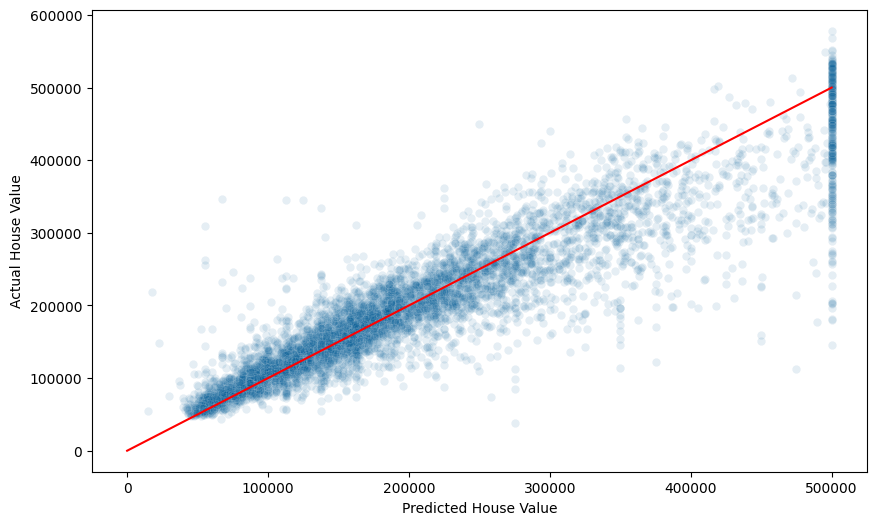

In [31]:
plt.figure(figsize= (10, 6))
sns.scatterplot(x= y_test, y= final_predictions, color= '#005b96', alpha=0.1)
plt.ylabel('Actual House Value')
plt.xlabel('Predicted House Value')
plt.plot([0,500000], [0, 500000], color='r')
plt.show()

The results are clustered around the desired function f(x) = x, where Predicted House Value is equal to Actual House value

Text(0.5, 0, 'Predicted House Value')

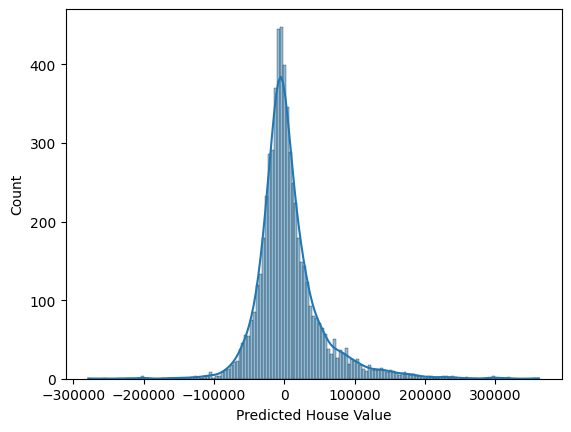

In [32]:
# Finding model's error distribution
sns.histplot(data=(y_test - final_predictions), kde=True)
plt.xlabel('Predicted House Value')

It is a normally distributed Error of our model, so it works perfect.